<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:

movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:

shortest = movies.sort_values('duration',ascending=True).head(1)

longest = movies.sort_values('duration',ascending=False).head(1)

print(shortest)

print(longest)


     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

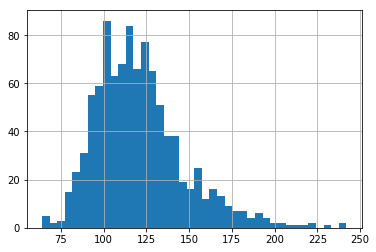

In [8]:
# Answer:

movies.loc[:,'duration'].hist(bins=40)

#### Use a box plot to display that same data.

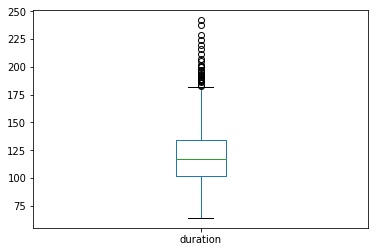

In [119]:
# Answer:

ax = movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [120]:
# Answer:

movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,0,'Ratings')

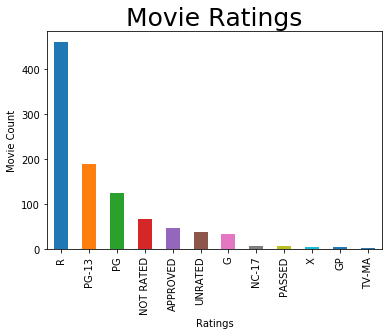

In [9]:
# Answer:

ax = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')

ax.set_title('Movie Ratings',fontsize = 25)

ax.set_ylabel('Movie Count')

ax.set_xlabel('Ratings')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:

movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:

movies.content_rating.replace(['X','TV-MA'],'NC-17',inplace=True)

movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [76]:
# Answer:


missing_values = movies.loc[movies.loc[:,'content_rating'].isnull(),:] 

print(missing_values) #missing values appear to be old western movies. After research the 
# first 2 are pg while True Grit is rated G

#create new collumn = the the content rating then select 

movies.loc[:,'content_rating_modified'] = movies.content_rating

movies.loc[movies.loc[:,'title'] == 'Butch Cassidy and the Sundance Kid','content_rating_modified'] = 'PG' #create new collumn and rerun data

movies.loc[movies.loc[:,'title'] == 'Where Eagles Dare','content_rating_modified'] = 'PG'

movies.loc[movies.loc[:,'title'] == 'True Grit','content_rating_modified'] = 'G'

print(missing_values)


     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  \
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...   
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...   
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']   

    content_rating_modified  
187                      PG  
649                      PG  
936                       G  
     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            N

Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:

print(movies.loc[movies.loc[:,'duration'] >120,'star_rating'].mean())

print(movies.loc[movies.loc[:,'duration'] <=120,'star_rating'].mean())

7.953669724770622
7.8384898710865345


#### Use a visualization to detect whether there is a relationship between duration and star rating.

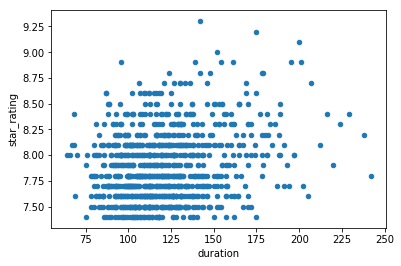

In [20]:
# Answer:

movies.plot(kind='scatter', x = 'duration',y = 'star_rating')

#### Calculate the average duration for each genre.

In [21]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11adc5400>,
      dtype=object)

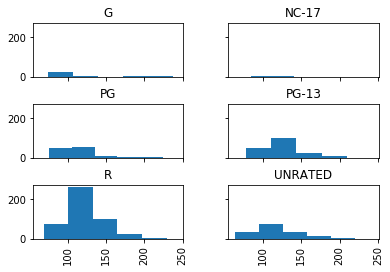

In [24]:
# Answer:

movies.hist('duration',bins = 5, by='content_rating',sharex=True,sharey=True)


#### Determine the top rated movie (by star rating) for each genre.

In [118]:
# Answer:

movies.groupby('genre').title.first()



genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [74]:
# Answer:

duplicate_titles = movies.loc[movies.duplicated('title')==True,'title']

print(duplicate_titles)

movies[movies.title.isin(duplicate_titles)]

#The movies are not duplicates.  Rather, they are remakes with different actors
#They should not be dropped 

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object


,star_rating,title,content_rating,genre,duration,actors_list,content_rating_modified
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",R
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",R
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",G
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",PG-13
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",UNRATED
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",R
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",PG-13
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",G


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [117]:
# Answer:


movies.genre.value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [115]:
# Answer:



Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [114]:
# Answer:




#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [ ]:
#Didn't have time to execute in code but an interesting analysis would be to answer "Who
#has the most range as an actor?  Range is defined by the most number of genres and the 
#higest average star rating for each drama.  Some issues with this analysis to note is that
# a single actor does not determine the entire star rating for a movie and hypothesis is that
# an actor may have success in similar genres (e.g., action and adventure) These issues obviously lessen the measure. Still, could
# be an interesting proxy "